# Laminar Burning Velocity Review 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Post_doc/CF_Laminar'

/content/drive/My Drive/Post_doc/CF_Laminar


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from math import pow
from numpy.linalg import inv

## Imperical Data Fit Star CCM

Reference paper: M. Metghalchi, J.C. Keck. Burning velocities of mixtures of air with methanol, isooctane, and indolene at high pressure and temperature
Combust. Flame, 48 (1982), pp. 191-210

![alt text](https://drive.google.com/uc?id=1-QqsLe08KesTk1btsKAmbzaD9T3PRID8)

In [ ]:
star_co = pd.read_csv('star_coef.txt', sep = " ",names=['Fuel','phim','Bm','B2','delta'],header=None)

#choose the fuel of intrest
star_co = star_co[star_co['Fuel'].str.contains('Iso')]
#display the data from this source 
#uncomment to display fit coefficient for the fuel
star_co

,Fuel,phim,Bm,B2,delta
2,Isooctane,1.13,26.32,-84.72,0.19


In [ ]:
# Define alpha function
def alpha_star(phi):
    ans=2.18-0.8*(phi-1)
    return ans

In [ ]:
# Define beta function
def beta_star(phi):
    ans=-0.16+0.22*(phi-1)
    return ans 

In [ ]:
def Su0(phi):
    ans=star_co.Bm+star_co.B2*pow((phi-star_co.phim),2)
    return ans

In [ ]:
def Star_su(phi,temp,P,f):
    phi1=phi-1
    temp=temp/298;
    P=P/1;
    ans=Su0(phi)*pow(temp,alpha_star(phi))*pow(P,beta_star(phi))*(1-2.1*f)
    return ans 

## Imperical Data Fit Oxford University

Reference paper: S. Marshall, S. Taylor, C. Stone, T. Davies, and R. Cracknell. Laminar burning velocity measurements of liquid fuels at elevatedpressures and temperatures with combustion residuals.Combustion and Flame, 158(10):1920 – 1932, 2011

Import all coefficient and identify fuel of interest

![alt text](https://drive.google.com/uc?id=1sFeXAg_bhv1FcnXNVpBtYZ2VtUNnuRZA)

![alt text](https://drive.google.com/uc?id=1G-WLpjbvRKZJKl2QveiWYcBX43IBfagK)

In [ ]:
ox_co = pd.read_csv('Ox_coef.txt', sep = "\t",names=['Fuel','Su_0','Su_1','Su_2','Su_3','Su_4','a0','a1','a2','b0','b1','b2','mu1','mu2','mu3'],header=1)

#choose the fuel of intrest
ox_co = ox_co[ox_co['Fuel'].str.contains('Iso')]
#display the data from this source 
#uncomment to display fit coefficient for the fuel
ox_co

,Fuel,Su_0,Su_1,Su_2,Su_3,Su_4,a0,a1,a2,b0,b1,b2,mu1,mu2,mu3
0,Iso-octane,28.481,13.11,-80.048,56.593,57.734,1.8889,-0.084562,0.0,-0.1997,0.10737,0.0,2.0808,0.82827,0.021031


![alt text](https://drive.google.com/uc?id=1F0k__X96S6CUNFRKlNNZ_sOOs5jE0lsM)

* ### Alpha function definition

In [ ]:
def alpha(phi):
    ans=ox_co.a0+ox_co.a1*(phi-1)+ox_co.a2*pow((phi-1),2)
    return ans


* ### Beta function definition

In [ ]:
def beta(phi):
    ans=ox_co.b0+ox_co.b1*(phi-1)+ox_co.b2*pow((phi-1),2)
    return ans


* ### Laminar burning velocity fit function

![alt text](https://drive.google.com/uc?id=1sFeXAg_bhv1FcnXNVpBtYZ2VtUNnuRZA)

In [ ]:
def Ox_su(phi,temp,P,Xr):
    phi1=phi-1
    temp=temp/298;
    ans1=ox_co.Su_0+ox_co.Su_1*phi1+ox_co.Su_2*pow(phi1,2)+ox_co.Su_3*pow(phi1,3)+ox_co.Su_4*pow(phi1,4)
    ans2=(1-ox_co.mu1*pow(Xr,ox_co.mu2+phi1*ox_co.mu3))*pow(temp,alpha(phi))*pow(P,beta(phi))
    ans=ans1*ans2
    return ans 
    

## Experiemtal Data Set 1

Data source number 1: Galmiche, Bénédicte, Fabien Halter, and Fabrice Foucher. "Effects of high pressure, high temperature and dilution on laminar burning velocities and Markstein lengths of iso-octane/air mixtures." Combustion and Flame 159, no. 11 (2012): 3286-3299.

### Foucher O2 Enrichement Data

Importing Foucher 423 K 1 Bar O2 enrichment Laminar Burning Velocity Data <br>
τ (%) P (bar)  T (K)  φ SL0 (cm/s)  Lb(mm)


In [ ]:
#import data from the set


Foucher_O2 = pd.read_csv('Foucher_O2.txt', sep = "\t", names=['V_O2', 'P','Temp', 'phi','SL0','Lb'],header=1)

#display the data from this source 
display(Foucher_O2)
#uncomment to display data from this source
#For displaying data range
print('Data range from this source')
Foucher_O2.describe().loc[['min', 'max'], :]


,V_O2,P,Temp,phi,SL0,Lb
0,20.5,1,423,0.912,52.041,0.873
1,20.5,1,423,1.003,55.223,0.759
2,20.5,1,423,1.049,55.975,0.682
3,20.5,1,423,1.099,55.633,0.612
4,20.5,1,423,1.185,53.101,0.523
5,20.5,1,423,1.247,49.769,0.273
6,20.5,1,423,1.335,40.541,-0.116
7,20.5,1,423,1.424,29.843,-0.987
8,20.5,1,423,1.516,21.702,-2.383
9,20.5,1,423,1.612,15.512,-3.921


Data range from this source


,V_O2,P,Temp,phi,SL0,Lb
min,20.5,1.0,423.0,0.783,15.512,-3.921
max,25.0,1.0,423.0,1.612,87.045,0.893


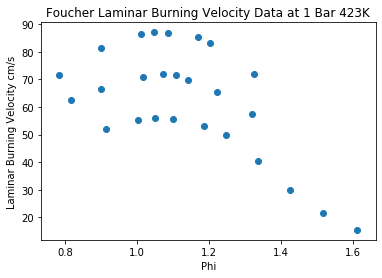

In [ ]:
#This is a plotting for the above data
#Plot different variables against each other 
plt.scatter(Foucher_O2.phi, Foucher_O2.SL0)
plt.title('Foucher Laminar Burning Velocity Data at 1 Bar 423K')
plt.xlabel('Phi')
plt.ylabel('Laminar Burning Velocity cm/s')
plt.show()

### Foucher N2 Dilution Data

Importing Foucher N2 dilution Laminar Burning Velocity Data <br>
N2_τ (%) P (bar)  T (K)  φ SL0 (cm/s)  Lb(mm)

In [ ]:
#importing Foucher N2 data
Foucher_N2 = pd.read_csv('Foucher_N2.txt', sep = "\t", names=['V_Tau', 'P','Temp', 'phi','SL0','Lb'],header=1)

#uncomment to display the data from this source 
display(Foucher_N2)

#For displaying data range
print('Data range from this source')
Foucher_N2.describe().loc[['min', 'max'], :]

,V_Tau,P,Temp,phi,SL0,Lb
0,0,1,323,0.935,32.490,1.030
1,0,1,323,1.011,34.818,0.974
2,0,1,323,1.047,35.203,0.874
3,0,1,323,1.115,35.009,0.771
4,0,1,323,1.150,34.358,0.656
...,...,...,...,...,...,...
242,20,10,373,1.101,10.786,0.531
243,20,10,423,1.102,13.204,0.558
244,25,1,423,1.167,23.555,1.201
245,25,1,423,1.225,21.940,0.627


Data range from this source


,V_Tau,P,Temp,phi,SL0,Lb
min,0.0,1.0,323.0,0.606,8.691,-5.233
max,25.0,10.0,473.0,1.628,68.787,1.220


Plotting for Foucher N2 dilution profile 

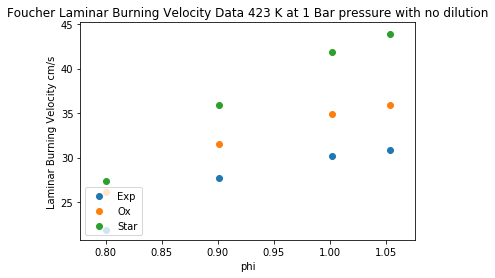

In [ ]:
#Set temperature you are intersted after .eq 
Foucher_N2_t = Foucher_N2[Foucher_N2.Temp.eq(423)]
#Set pressure you are intersted after .eq 
Foucher_N2_tp = Foucher_N2_t[Foucher_N2_t.P.eq(10)]
#Set percentage of N2 dilution you are interested after .eq 
Foucher_N2_tpd=Foucher_N2_tp[Foucher_N2_tp.V_Tau.eq(0)]


#Oxford model predictions
b=Foucher_N2_tpd.phi.to_numpy()
c=np.count_nonzero(b)
Ox_model=np.zeros((c, 1))
for x in range(c):
  Ox_model[x]=Ox_su(b[x],423,10,0)
Ox_model.transpose 

#Star model predictions
d=Foucher_N2_tpd.phi.to_numpy()
e=np.count_nonzero(d)
Star_model=np.zeros((e, 1))
for x in range(e):
  Star_model[x]=Star_su(d[x],423,10,0)
Star_model.transpose 


#Plot the variables you are intersted from Foucher 
plt.scatter(Foucher_N2_tpd.phi, Foucher_N2_tpd.SL0,label='Exp')

#Plot from Oxford model
plt.scatter(Foucher_N2_tpd.phi, Ox_model,label='Ox')

#Plot from Star model 
plt.scatter(Foucher_N2_tpd.phi, Star_model,label='Star')

plt.title('Foucher Laminar Burning Velocity Data 423 K at 1 Bar pressure with no dilution')
plt.xlabel('phi')
plt.ylabel('Laminar Burning Velocity cm/s')
plt.legend(loc='lower left')
plt.show()
a=plt

In [ ]:
Foucher_N2_range=Foucher_N2[Foucher_N2.V_Tau.eq(0)]
Foucher_N2_range_P=Foucher_N2_range[Foucher_N2_range.P.eq(5)]
Foucher_N2_range_P.phi.describe()


count    35.000000
mean      0.981971
std       0.177833
min       0.651000
25%       0.803500
50%       1.006000
75%       1.125500
max       1.253000
Name: phi, dtype: float64

## Experiemtal Data Set 2


Data source 2: Konnov, Alexander A., Akram Mohammad, Velamati Ratna Kishore, Nam Il Kim, Chockalingam Prathap, and Sudarshan Kumar. "A comprehensive review of measurements and data analysis of laminar burning velocities for various fuel+ air mixtures." Progress in Energy and Combustion Science 68 (2018): 197-267.

### Konnov Laminar Burning Velocity Data

Importing all data from Konnov review paper <br>
T (K) P (atm) Equivalence Ratio SL0 (cm/s)

In [ ]:
# Fuel Oxidizer Tu (K) Pu (atm) Equivalence Ratio SL0 (cm/s) α β Method Reference Note
Konnov = pd.read_csv('Konnov.txt', sep = "\t", index_col=False,names=['Temp', 'P','phi','SL0','alpha','beta','method','Ref'],header=1)

#uncomment the next line to display the data from this source 
display(Konnov)

#For displaying data range
print('Data range from this source')
Konnov.describe().loc[['min', 'max'], :]

,Temp,P,phi,SL0,alpha,beta,method,Ref
0,300,1.0,0.70,20.92,NaN,NaN,Stagnation flame/linear,Davis and Law 1998
1,300,1.0,0.81,26.57,NaN,NaN,Stagnation flame/linear,Davis and Law 1998
2,300,1.0,0.86,30.11,NaN,NaN,Stagnation flame/linear,Davis and Law 1998
3,300,1.0,0.91,32.37,NaN,NaN,Stagnation flame/linear,Davis and Law 1998
4,300,1.0,1.00,35.34,NaN,NaN,Stagnation flame/linear,Davis and Law 1998
...,...,...,...,...,...,...,...,...
294,423,1.0,1.20,57.09,NaN,NaN,Heat flux method,Knorsch et al. 2014
295,423,1.0,1.30,51.25,NaN,NaN,Heat flux method,Knorsch et al. 2014
296,423,1.0,1.40,41.68,NaN,NaN,Heat flux method,Knorsch et al. 2014
297,423,1.0,1.50,34.09,NaN,NaN,Heat flux method,Knorsch et al. 2014


Data range from this source


,Temp,P,phi,SL0,alpha,beta
min,300.0,1.0,0.6,7.08,1.62,NaN
max,470.0,25.0,1.7,79.03,2.07,NaN


Konnov Data Plot

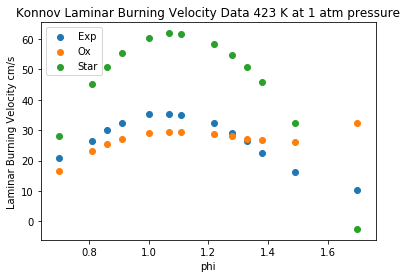

In [ ]:
#Set temperature you are intersted after .eq 
Konnov_t = Konnov[Konnov.Temp.eq(300)]
#Set pressure you are intersted after .eq in atm
Konnov_tp = Konnov_t[Konnov_t.P.eq(1)]
# Set data  from a specific group source after .eq
Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Davis')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Bradley')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Huang')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Kumar')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Davis')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Jerze')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Halter')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Kelley')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('van')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Zhou')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Small')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Sileg')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Dirren')]
#Konnov_tpr = Konnov_tp[Konnov_tp['Ref'].str.contains('Knnorsch')]


#Plot the data you are intersted from a specific source 
#plt.scatter(Konnov_tpr.phi, Konnov_tpr.SL0)


#Oxford model predictions
b=Konnov_tpr.phi.to_numpy()
c=np.count_nonzero(b)
Ox_model=np.zeros((c, 1))
for x in range(c):
  Ox_model[x]=Ox_su(b[x],300,1/1.0325,0)
Ox_model.transpose 



#Star model predictions
d=Konnov_tpr.phi.to_numpy()
e=np.count_nonzero(d)
Star_model=np.zeros((e, 1))
for x in range(e):
  Star_model[x]=Star_su(d[x],423,1,0)
Star_model.transpose 

#plot all data in this paper 
plt.scatter(Konnov_tpr.phi, Konnov_tpr.SL0,label='Exp')

#Plot from Oxford model
plt.scatter(Konnov_tpr.phi, Ox_model,label='Ox')

#Plot from Star model 
plt.scatter(Konnov_tpr.phi, Star_model,label='Star')


plt.title('Konnov Laminar Burning Velocity Data 423 K at 1 atm pressure')
plt.xlabel('phi')
plt.ylabel('Laminar Burning Velocity cm/s')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pd.set_option('display.max_rows', 1000)
#Set temperature you are intersted after .eq 
Konnov_range = Konnov[Konnov.P.eq(25)]
Konnov_range_T= Konnov_range[Konnov_range.Temp>=400]
#display(Konnov_range_T)
Konnov_range_T.describe()

,Temp,P,phi,SL0,alpha,beta
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


## Experiemtal Data Set 3

Data source 3: Susa, A.J., Ferris, A.M., Davidson, D.F. and Hanson, R.K., 2019. Experimental Shock Tube Measurements of Laminar Burning Velocity of n-Heptane and iso-Octane in the Negative Temperature Coefficient Regime. AIAA Scitech 2019 Forum (paper no. 0460).

### Up to 600 K temperature dataset

In [ ]:
# Fuel Oxidizer T_5 (K) P_5 (atm) phi (-) x_iC8H18 (-) x_O2 (-) x_N2 (-) x_He (-) S_L (cm/s) L_b (cm) Reference Note
Susa_600 = pd.read_csv('Susa_600.txt', sep = "\t", index_col=False,names=['Temp', 'P','phi','X_iso','X_o2','X_N2','X_he','SL0','Lb'],header=1)

#uncomment the next line to display the data from this source 
display(Susa_600)

#For displaying data range
print('Data range from this source')
Susa_600.describe().loc[['min', 'max'], :]

,Temp,P,phi,X_iso,X_o2,X_N2,X_he,SL0,Lb
0,549.2770,1.0151,0.8985,0.0148,0.2059,0.7793,0,103.8208,0.1067
1,413.8912,1.1284,0.8878,0.0149,0.2098,0.7753,0,34.0035,0.1005
2,404.2688,1.0431,0.8878,0.0149,0.2098,0.7753,0,40.5111,0.0486
3,528.7164,1.0415,0.8878,0.0149,0.2098,0.7753,0,74.7077,0.0700
4,428.7474,1.0209,0.8886,0.0149,0.2098,0.7753,0,51.0355,0.0809
5,474.9602,0.9923,0.8886,0.0149,0.2098,0.7753,0,63.4858,0.0955
6,563.8699,0.9376,0.8886,0.0149,0.2098,0.7753,0,132.2722,0.1190


Data range from this source


,Temp,P,phi,X_iso,X_o2,X_N2,X_he,SL0,Lb
min,404.2688,0.9376,0.8878,0.0148,0.2059,0.7753,0.0,34.0035,0.0486
max,563.8699,1.1284,0.8985,0.0149,0.2098,0.7793,0.0,132.2722,0.1190


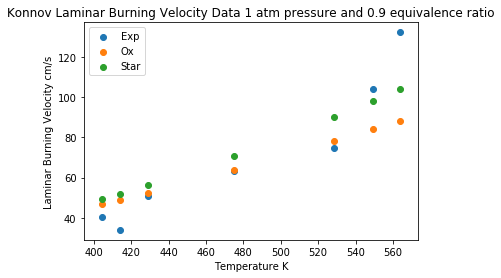

In [ ]:

#Plot the data you are intersted from a specific source 



#Oxford model predictions
b=Susa_600.Temp.to_numpy()
c=np.count_nonzero(b)
Ox_model=np.zeros((c, 1))
for x in range(c):
  Ox_model[x]=Ox_su(0.9,b[x],1,0)
Ox_model.transpose 



#Star model predictions
d=Susa_600.Temp.to_numpy()
e=np.count_nonzero(d)
Star_model=np.zeros((e, 1))
for x in range(e):
  Star_model[x]=Star_su(0.9,d[x],1,0)
Star_model.transpose 

#plot all data in this paper 
plt.scatter(Susa_600.Temp, Susa_600.SL0,label='Exp')

#Plot from Oxford model
plt.scatter(Susa_600.Temp, Ox_model,label='Ox')

#Plot from Star model 
plt.scatter(Susa_600.Temp, Star_model,label='Star')


plt.title('Konnov Laminar Burning Velocity Data 1 atm pressure and 0.9 equivalence ratio')
plt.xlabel('Temperature K')
plt.ylabel('Laminar Burning Velocity cm/s')
plt.legend(loc='upper left')
plt.show()

### Helium from 500K to 900K

In [ ]:
# Fuel Oxidizer T_5 (K) P_5 (atm) phi (-) x_iC8H18 (-) x_O2 (-) x_N2 (-) x_He (-) S_L (cm/s) L_b (cm) Reference Note
Susa_he = pd.read_csv('Susa_he.txt', sep = "\t", index_col=False,names=['Temp', 'P','phi','X_iso','X_o2','X_N2','X_he','SL0','Lb'],header=1)

#uncomment the next line to display the data from this source 
display(Susa_he)

#For displaying data range
print('Data range from this source')
Susa_he.describe().loc[['min', 'max'], :]

,Temp,P,phi,X_iso,X_o2,X_N2,X_he,SL0,Lb
0,545.6507,1.0828,0.9004,0.0128,0.1777,0.4051,0.4044,93.45639,0.0973
1,561.5786,0.9800,0.9004,0.0128,0.1777,0.4051,0.4044,99.73302,0.1032
2,584.2551,0.9794,0.9004,0.0128,0.1777,0.4051,0.4044,108.18961,0.0924
3,595.1517,0.9455,0.9004,0.0128,0.1777,0.4051,0.4044,103.79668,0.0863
4,620.8421,0.9624,0.9004,0.0128,0.1777,0.4051,0.4044,150.41909,0.0800
5,628.9344,0.9167,0.9004,0.0128,0.1777,0.4051,0.4044,190.40840,0.0710
6,640.8406,0.9634,0.9004,0.0128,0.1777,0.4051,0.4044,198.54993,0.0745
7,671.9277,1.0049,0.9004,0.0128,0.1777,0.4051,0.4044,264.45472,0.0955
8,703.7452,0.9724,0.9004,0.0128,0.1777,0.4051,0.4044,376.70835,0.0856
9,682.3326,0.9023,0.9004,0.0128,0.1777,0.4049,0.4046,217.75403,0.0746


Data range from this source


,Temp,P,phi,X_iso,X_o2,X_N2,X_he,SL0,Lb
min,545.6507,0.9023,0.9004,0.0128,0.1777,0.4049,0.4044,93.45639,0.0139
max,886.8260,1.0828,0.9004,0.0128,0.1777,0.4051,0.4046,425.84616,0.1138


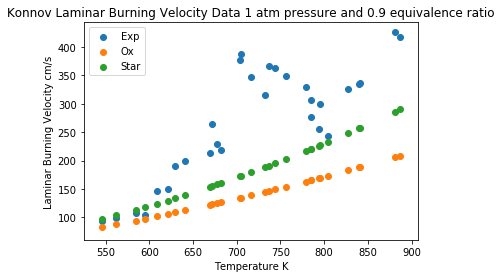

In [ ]:

#Plot the data you are intersted from a specific source 



#Oxford model predictions
b=Susa_he.Temp.to_numpy()
c=np.count_nonzero(b)
Ox_model=np.zeros((c, 1))
for x in range(c):
  Ox_model[x]=Ox_su(0.9,b[x],1,0)
Ox_model.transpose 



#Star model predictions
d=Susa_he.Temp.to_numpy()
e=np.count_nonzero(d)
Star_model=np.zeros((e, 1))
for x in range(e):
  Star_model[x]=Star_su(0.9,d[x],1,0)
Star_model.transpose 

#plot all data in this paper 
plt.scatter(Susa_he.Temp, Susa_he.SL0,label='Exp')

#Plot from Oxford model
plt.scatter(Susa_he.Temp, Ox_model,label='Ox')

#Plot from Star model 
plt.scatter(Susa_he.Temp, Star_model,label='Star')


plt.title('Konnov Laminar Burning Velocity Data 1 atm pressure and 0.9 equivalence ratio')
plt.xlabel('Temperature K')
plt.ylabel('Laminar Burning Velocity cm/s')
plt.legend(loc='upper left')
plt.show()